In [2]:
pip install -U yellowbrick

     ------------------------------------ 282.6/282.6 kB 562.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### сохранение изобраений 

In [4]:
# visualizer.show(outpath="pcoords.png")

### выбор модели

### о модели

используются данные грибов из модуля Yellowbrick Example Datasets. Наша цель - предсказать, является ли гриб ядовитым или съедобным, основываясь на его характеристиках.

In [5]:
from yellowbrick.datasets import load_mushroom 
X,y = load_mushroom() 
print(X[:5]) # inspect the first five rows

    shape surface   color
0  convex  smooth  yellow
1    bell  smooth   white
2  convex   scaly   white
3  convex  smooth    gray
4  convex   scaly  yellow


### Извлечение функций

Наши данные, включая цель, являются категориальными. Нам нужно будет изменить эти значения на числовые для машинного обучения. Чтобы извлечь это из набора данных, нам нужно будет использовать scikit-learn transformers для преобразования нашего входного набора данных во что-то, что может соответствовать модели. К счастью, scikit-learn предоставляет преобразователи для преобразования категориальных меток в числовые целые числа: sklearn.preprocessing.LabelEncoder и sklearn.предварительная обработка.OneHotEncoder.

In [11]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [12]:
models = [
    SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(),
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3),
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300)
]

In [13]:
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

for model in models:
    score_model(X, y, model)

SVC: 0.6624286455630514
NuSVC: 0.6726016476215785
LinearSVC: 0.6583804143126177
SGDClassifier: 0.619678200199345
KNeighborsClassifier: 0.6581185045215279
LogisticRegression: 0.6580434509606933


C:\Users\1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionCV: 0.6583804143126177
BaggingClassifier: 0.6871364804544838
ExtraTreesClassifier: 0.6871364804544838
RandomForestClassifier: 0.6873056644585642


### Визуальная оценка модели

In [14]:
from yellowbrick.classifier import ClassificationReport

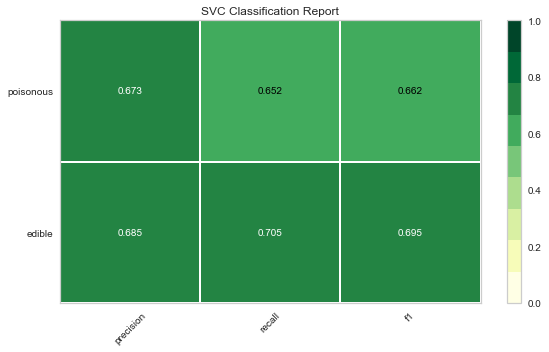

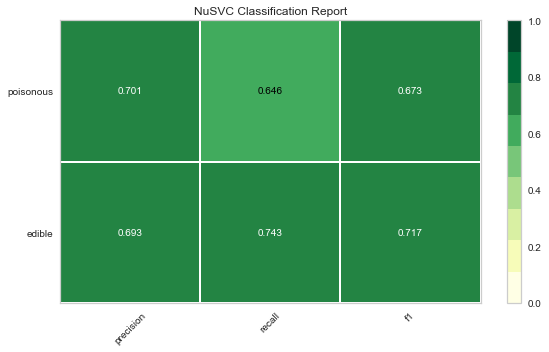

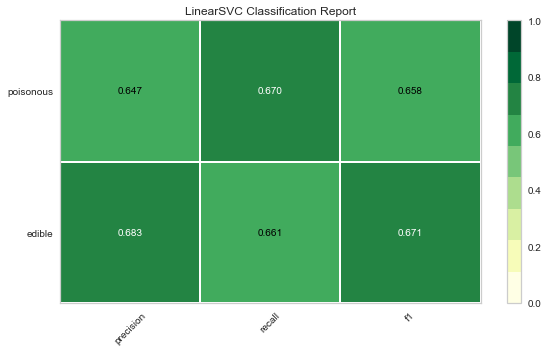

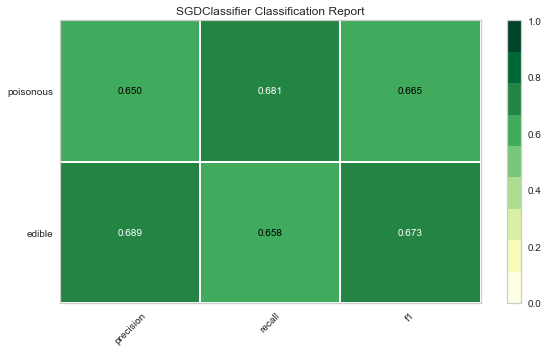

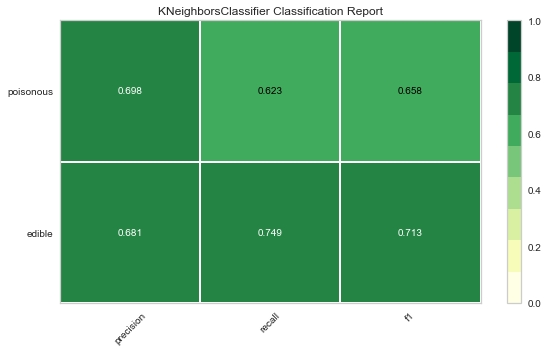

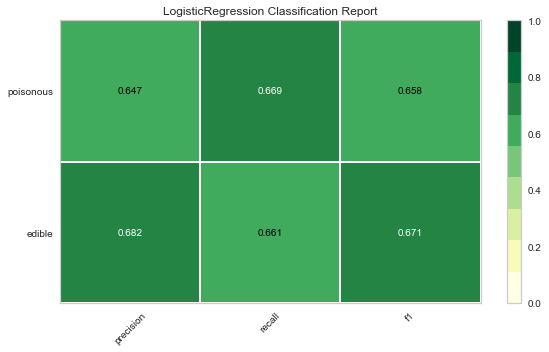

C:\Users\1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


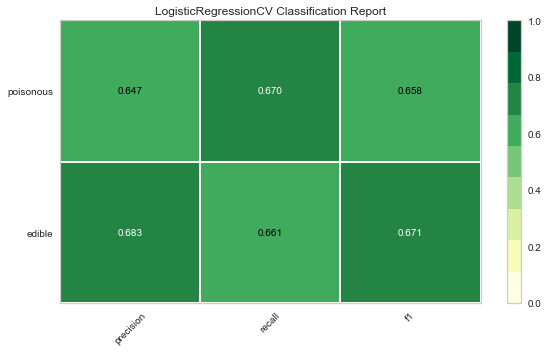

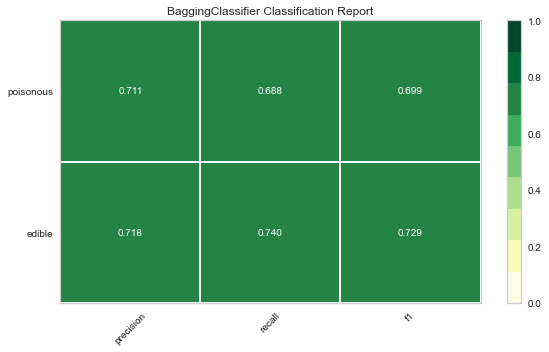

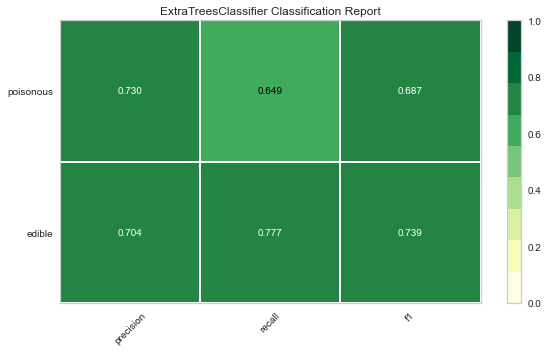

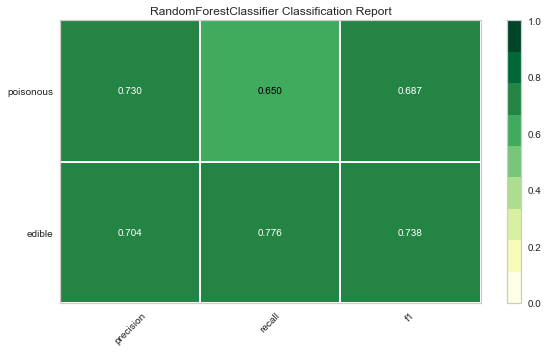

In [15]:
def visualize_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['edible', 'poisonous'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    visualizer.fit(X, y)
    visualizer.score(X, y)
    visualizer.show()

for model in models:
    visualize_model(X, y, model)

### Анализ функций

### Rank2D 

Графики rank1dи rank2dпоказывают попарное ранжирование объектов, чтобы помочь вам определить взаимосвязи. 

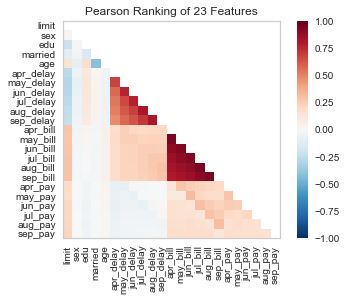

In [16]:
from yellowbrick.features import rank2d 
from yellowbrick.datasets import load_credit 
X, _ = load_credit() 
visualizer = rank2d(X)

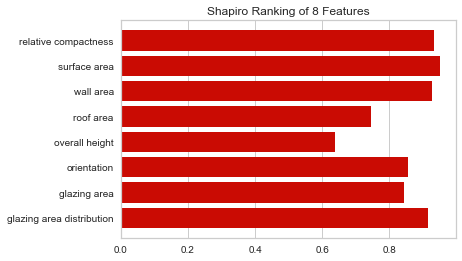

In [17]:
from yellowbrick.features import rank1d 
from yellowbrick.datasets import load_energy 
X , _ = load_energy() 
visualizer = rank1d(X, color="r")

### Параллельные координаты

parallel_coordinatesГрафик представляет собой горизонтальную визуализацию экземпляров с разбивкой по описывающим их функциям.

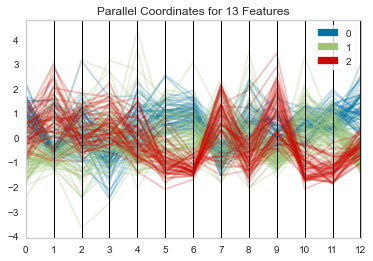

In [20]:
from sklearn.datasets import load_wine 
from yellowbrick.features import parallel_coordinates 
X,y = load_wine(return_X_y = True) 
visualizer = parallel_coordinates(X, y, normalize = "standard")

Внимательно изучив визуализацию, мы видим, что сочетание прозрачности и перекрытия дает нам ощущение групп похожих экземпляров, иногда называемых “косами”. Если существуют отдельные косы разных классов, это говорит о том, что существует достаточная разделимость, которую алгоритм классификации может различить между каждым классом.

### Радиальная визуализация

На radvizграфике показано разделение экземпляров по единичному кругу. 

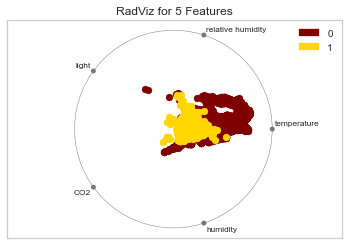

In [21]:
from yellowbrick.features import radviz 
from yellowbrick.datasets import load_occupancy 
X,y = load_occupancy() 
visualizer = radviz(X,y,colors = ["maroon","gold"])

RadViz это многомерный алгоритм визуализации данных, который равномерно отображает каждое измерение объекта по окружности окружности, а затем отображает точки на внутренней стороне окружности таким образом, чтобы точка нормализовала свои значения по осям от центра к каждой дуге. Этот механизм позволяет использовать столько размеров, сколько легко поместится на окружности, значительно расширяя размерность визуализации.

Специалисты по обработке данных используют этот метод для определения разделимости между классами. Например. есть ли возможность извлечь уроки из набора функций или просто слишком много шума?

### PCA

A pca_decomposition- это проекция экземпляров на основе основных компонентов

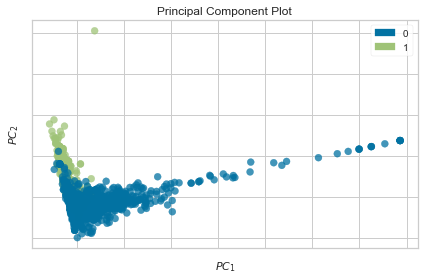

In [22]:
from yellowbrick.datasets import load_spam 
from yellowbrick.features import pca_decomposition 
X,y = load_spam() 
visualizer = pca_decomposition(X,y)

### Коллектор

manifold_embeddingГрафик представляет собой многомерную визуализацию с множественным обучением, которая может показывать нелинейные взаимосвязи в объектах.

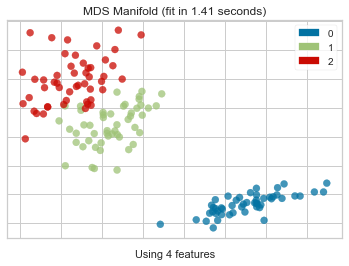

In [23]:
from sklearn.datasets import load_iris 
from yellowbrick.features import manifold_embedding 
X,y = load_iris(return_X_y = True) 
visualizer = manifold_embedding(X,y)

### Классификация
Ошибка прогнозирования класса

class_prediction_errorГрафик иллюстрирует ошибку и поддержку в классификации в виде столбчатой диаграммы.

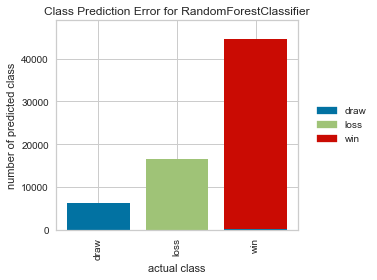

In [24]:
from yellowbrick.datasets import load_game 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.ensemble import RandomForestClassifier 
from yellowbrick.classifier import class_prediction_error 
X,y = load_game() 
X = OneHotEncoder().fit_transform(X) 
visualizer = class_prediction_error(RandomForestClassifier(n_estimators = 10),X,y)

ClassPredictionErrorГрафик Yellowbrick представляет собой поворот к другим, а иногда и более знакомым инструментам диагностики модели классификации, таким как матрица путаницы и отчет о классификации. Как и в отчете о классификации, этот график показывает поддержку (количество обучающих выборок) для каждого класса в подогнанной модели классификации в виде столбчатой диаграммы с накоплением. Каждый столбец сегментирован, чтобы показать долю прогнозов (включая ложноотрицательные и ложноположительные результаты, например, матрицу путаницы) для каждого класса. Вы можете использовать aClassPredictionError, чтобы визуализировать, с какими классами вашему классификатору особенно сложно, и, что более важно, какие неправильные ответы он дает для каждого класса. Часто это позволяет лучше понять сильные и слабые стороны различных моделей и конкретные проблемы, уникальные для вашего набора данных.

Диаграмма ошибок прогнозирования классов позволяет быстро понять, насколько хорош ваш классификатор в прогнозировании правильных классов.

### Матрица путаницы
A confusion_matrix- это визуальное описание принятия решений для каждого класса.

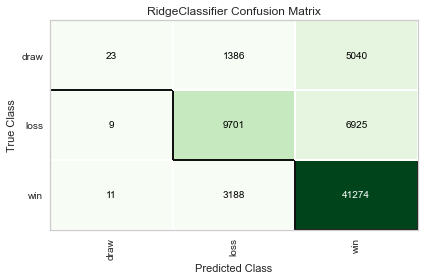

In [25]:
from yellowbrick.datasets import load_game 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.linear_model import RidgeClassifier 
from yellowbrick.classifier import confusion_matrix 
X,y = load_game() 
X = OneHotEncoder().fit_transform(X) 
visualizer = confusion_matrix(RidgeClassifier(), X, y, cmap="Greens")

ConfusionMatrixВизуализатор ScoreVisualizer- это программа, которая использует встроенный классификатор scikit-learn и набор тестов Xи yзначений и возвращает отчет, показывающий, как каждое из значений теста, предсказанных классами, сравнивается с их фактическими классами. Специалисты по обработке данных используют матрицы путаницы, чтобы понять, какие классы легче всего запутать. Они предоставляют информацию, аналогичную той, что доступна в a ClassificationReport, но вместо оценок верхнего уровня они обеспечивают более глубокое понимание классификации отдельных точек данных.

### Точный отзыв

A precision_recall_curveпоказывает компромисс между точностью и отзывом для разных пороговых значений вероятности.

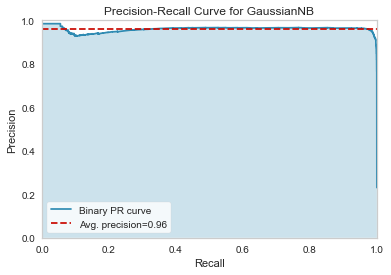

In [26]:
from sklearn.naive_bayes import GaussianNB 
from yellowbrick.datasets import load_occupancy 
from yellowbrick.classifier import precision_recall_curve 
X,y = load_occupancy() 
visualizer = precision_recall_curve(GaussianNB(),X,y)

PrecisionRecallCurveПоказывает компромисс между точностью классификатора, мерой релевантности результата, и отзывом, мерой полноты. Для каждого класса точность определяется как отношение истинных положительных результатов к сумме истинных и ложных положительных результатов, а отзыв — это отношение истинных положительных результатов к сумме истинных положительных результатов и ложных отрицательных результатов.

### ROCAUC

C:\Users\1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


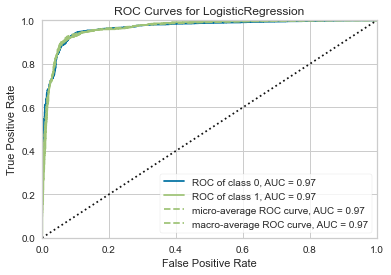

In [27]:
from yellowbrick.classifier import roc_auc 
from yellowbrick.datasets import load_spam 
from sklearn.linear_model import LogisticRegression 
X,y = load_spam() 
visualizer = roc_auc(LogisticRegression(),X,y)

Кривые рабочих характеристик приемника (ROC) - это показатель качества прогнозирования классификатора, который сравнивает и визуализирует компромисс между чувствительностью и специфичностью моделей. Кривая ROC отображает истинную положительную частоту по оси Y и ложноположительную частоту по оси X как в среднем по миру, так и по классу. Поэтому идеальной точкой является верхний левый угол графика: ложные срабатывания равны нулю, а истинные срабатывания равны единице.

### Порог дискриминации
discrimination_thresholdГрафик может помочь найти порог, который наилучшим образом разделяет двоичные классы.

C:\Users\1\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\1\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\1\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


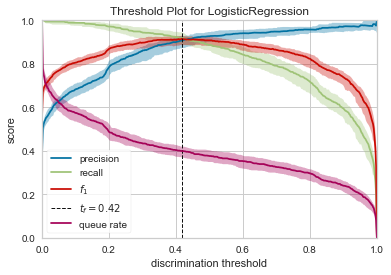

In [28]:
from yellowbrick.classifier import discrimination_threshold 
from sklearn.linear_model import LogisticRegression 
from yellowbrick.datasets import load_spam 
X,y = load_spam() 
visualizer = discrimination_threshold(LogisticRegression(multi_class="auto", solver="liblinear"),X,y)

### Регрессия
График остатков

A residuals_plotпоказывает разницу в остатках между обучающими и тестовыми данными.

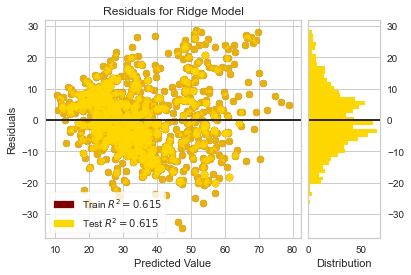

In [29]:
from sklearn.linear_model import Ridge 
from yellowbrick.datasets import load_concrete 
from yellowbrick.regressor import residuals_plot 
X,y = load_concrete() 
visualizer = residuals_plot(Ridge(),X,y,train_color="maroon",test_color="gold" )

Остатки в контексте регрессионных моделей представляют собой разницу между наблюдаемым значением целевой переменной (y) и прогнозируемым значением (ŷ), то есть ошибкой прогноза. График остатков показывает разницу между остатками на вертикальной оси и зависимой переменной на горизонтальной оси, что позволяет обнаруживать области в пределах целевого объекта, которые могут быть подвержены большей или меньшей ошибке.

Обычным использованием графика остатков является анализ дисперсии ошибки регрессора. Если точки случайным образом распределены вокруг горизонтальной оси, для данных обычно подходит модель линейной регрессии; в противном случае более подходящей является нелинейная модель. В приведенном выше случае мы видим довольно случайное, равномерное распределение остатков относительно цели в двух измерениях. Это, по-видимому, указывает на то, что наша линейная модель работает хорошо. Мы также можем видеть из гистограммы, что наша ошибка обычно распределяется около нуля, что также обычно указывает на хорошо подобранную модель.

### Ошибка прогнозирования

A prediction_errorпомогает определить, где регрессия допускает наибольшее количество ошибок.

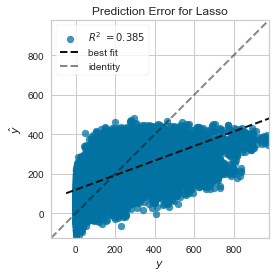

In [30]:
from sklearn.linear_model import Lasso 
from yellowbrick.datasets import load_bikeshare 
from yellowbrick.regressor import prediction_error 
X,y = load_bikeshare() 
visualizer = prediction_error(Lasso(),X,y)

### Расстояние между поварами
cooks_distanceГрафик показывает влияние экземпляров на линейную регрессию.

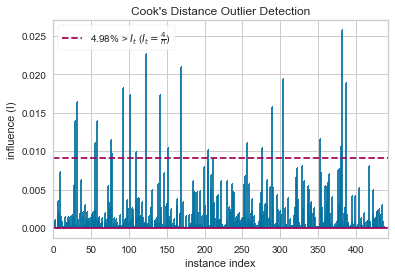

In [31]:
from sklearn.datasets import load_diabetes 
from yellowbrick.regressor import cooks_distance 
X,y = load_diabetes(return_X_y=True) 
visualizer = cooks_distance(X,y)

Расстояние Кука - это мера влияния наблюдения или экземпляров на линейную регрессию. Экземпляры с большим влиянием могут быть выбросами, а наборы данных с большим количеством точек с высоким влиянием могут не подходить для линейной регрессии без дальнейшей обработки, такой как удаление выбросов или вменение. CooksDistanceВизуализатор показывает график всех экземпляров по индексу и связанную с ними оценку расстояния, а также эвристический порог, чтобы быстро показать, какой процент набора данных может влиять на регрессионные модели OLS.

Наличие такого большого количества очень важных точек предполагает, что линейная регрессия может не подходить для этого набора данных. Возможно, нарушается одно или несколько из четырех предположений, лежащих в основе линейной регрессии; а именно: независимость наблюдений, линейность отклика, нормальность остатков или однородность дисперсии (“гомоскедастичность”).). Мы можем проверить последние три условия, используя остаточный график:

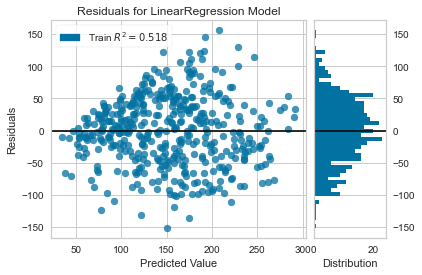

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [32]:
from sklearn.linear_model import LinearRegression 
from yellowbrick.regressor import ResidualsPlot 
# Instantiate and fit the visualizer 
model = LinearRegression() 
visualizer_residuals = ResidualsPlot(model) 
visualizer_residuals.fit(X,y) 
visualizer_residuals.show()

Остатки, по-видимому, нормально распределены вокруг 0, удовлетворяя условиям линейности и нормальности. Однако они слегка отклоняются в положительную сторону для больших прогнозируемых значений, а также, по-видимому, увеличиваются по величине по мере увеличения прогнозируемого значения, что указывает на нарушение условия гомоскедастичности.

Учитывая эту информацию, мы могли бы рассмотреть один из следующих вариантов: (1) использование линейной регрессии в любом случае, (2) использование линейной регрессии после удаления выбросов и (3) обращение к другим регрессионным моделям.

### Кластеризация
Оценки силуэта
A silhouette_visualizerможет помочь вам в выбореk, визуализируя значения коэффициента силуэта. Подробнее о визуализаторе силуэтов.

In [40]:
#from sklearn.cluster import KMeans 
#from yellowbrick.cluster import silhouette_visualizer 
#from yellowbrick.datasets import load_credit 
# Load a clustering dataset 
#X,y = load_credit() 
# Specify rows to cluster: under 40 y/o and have either graduate or university education 
#X = X[(X['age'] <= 40) & (X['edu'].isin([1,2]))] 
# Use the quick method and immediately show the figure 
#silhouette_visualizer(KMeans(5,random_state=42),X,colors='yellowbrick')

Коэффициент силуэта используется, когда достоверные данные о наборе данных неизвестны, и вычисляет плотность кластеров, вычисленную моделью. Оценка вычисляется путем усреднения коэффициента силуэта для каждой выборки, вычисляемого как разница между средним внутрикластерным расстоянием и средним расстоянием до ближайшего кластера для каждой выборки, нормализованным на максимальное значение. Это дает оценку от 1 до -1, где 1 - очень плотные кластеры, а -1 - совершенно неправильная кластеризация.

Визуализатор силуэта отображает коэффициент силуэта для каждого образца для каждого кластера, визуализируя, какие кластеры плотные, а какие нет. Это особенно полезно для определения дисбаланса кластера или для выбора значения для  путем сравнения нескольких визуализаторов.

### Межкластерное расстояние
A intercluster_distanceпоказывает размер и относительное расстояние между кластерами.

In [43]:
#from yellowbrick.datasets import load_nfl 
#from sklearn.cluster import MiniBatchKMeans 
#from yellowbrick.cluster import intercluster_distance 
#X,y = load_nfl() 
#visualizer = intercluster_distance(MiniBatchKMeans(5, random_state=777), X)

Карты межкластерных расстояний отображают вложение центров кластеров в 2 измерениях с сохранением расстояния до других центров. Например. чем ближе к центрам в визуализации, тем ближе они находятся в исходном пространстве объектов. Размеры кластеров определяются в соответствии с метрикой оценки. По умолчанию их размер определяется членством, например, количеством экземпляров, принадлежащих каждому центру. Это дает представление об относительной важности кластеров. Однако обратите внимание, что, поскольку два кластера перекрываются в 2D-пространстве, это не означает, что они перекрываются в исходном пространстве объектов.

### Целевой анализ
Баланс классов

class_balanceГрафик может облегчить понимание того, как распределение классов может повлиять на модель.

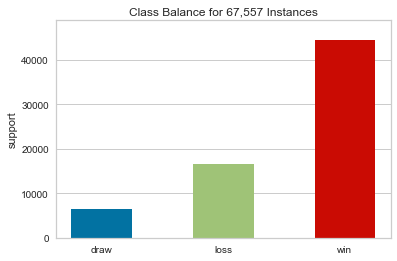

In [44]:
from yellowbrick.datasets import load_game 
from yellowbrick.target import class_balance 
X,y = load_game() 
visualizer = class_balance(y,labels=["draw","loss","win"])